# PART 2- Revenue Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

colors = ["#8DC63F", "#0F9AD6", "#013C5B", "#698795", "#000000"]
sns.set_palette(sns.color_palette(colors))

df = pd.read_csv('casestudy.csv')#.drop('Unnamed: 0', axis=1)
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


First, I want to confirm that the index column is the same as the native index. If it is, I'll drop it.

In [2]:
assert sum(df['Unnamed: 0'].values == np.arange(685927)) == df.shape[0]
df = df.drop('Unnamed: 0', axis=1) 

The problem statement is as follows:

For each year we need the following information:
- Total revenue for the current year
- New Customer Revenue e.g. new customers not present in previous year only
- Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year
- Revenue lost from attrition
- Existing Customer Revenue Current Year
- Existing Customer Revenue Prior Year
- Total Customers Current Year
- Total Customers Previous Year
- New Customers
- Lost Customers


One thing I noticed along the way is that there is some whitespace in some of the customer_email values. I'm going to strip those really quick so that it doesn't cause any problems in looking for matches:

In [3]:
df['customer_email'] = df['customer_email'].apply(lambda x: x.strip())

### Total Revenue

One thing to note is that the problem asks for the total revenue, but we are given the "net revenue." I'm going to assume for now that this is what we are being asked to add up, because I can't think of a way to recover the gross revenue.

In [4]:
total_rev = df.groupby('year')['net_revenue'].sum()
display(pd.DataFrame(total_rev.rename('Yearly Revenue')))


,Yearly Revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


### New Customer Revenue

I'm only going to return values for 2016 and 2017, as we don't have information about customers pre-2015.


In [5]:
df_2015 = df[df['year']==2015]
df_2016 = df[df['year']==2016]
df_2017 = df[df['year']==2017]
custs_2015 = set(df_2015.customer_email.values)
custs_2016 = set(df_2016.customer_email.values)
custs_2017 = set(df_2017.customer_email.values)

new_custs_2016 = list(custs_2016-custs_2015)
new_custs_2017 = list(custs_2017-custs_2016)

new_customer_2016_rev = sum(df_2016.set_index('customer_email').loc[new_custs_2016]['net_revenue'])
new_customer_2017_rev = sum(df_2017.set_index('customer_email').loc[new_custs_2017]['net_revenue'])
print('Total new customer revenue (2016): {:.2f}'.format(new_customer_2016_rev))
print('Total new customer revenue (2017): {:.2f}'.format(new_customer_2017_rev))


Total new customer revenue (2016): 17206366.90
Total new customer revenue (2017): 21769213.01


### Existing Customer Growth. 

Again, I'm going to return values for 2016 and 2017 only, as we do not have data on the existing customers in 2014.

I'm going to assume we want to track the customer revenue growth for consistent customers year-to-year, and not all customers that existed in a given year.

In [6]:
existing_custs_2016 = list(custs_2016.intersection(custs_2015))
existing_custs_2017 = list(custs_2017.intersection(custs_2016))

# Customers that existed in 2015 and 2016
existing_customer_2015 = sum(df_2015.set_index('customer_email').loc[existing_custs_2016]['net_revenue'])
existing_customer_2016_1 = sum(df_2016.set_index('customer_email').loc[existing_custs_2016]['net_revenue'])

# Customers that existed in 2016 and 2017
existing_customer_2016_2 = sum(df_2016.set_index('customer_email').loc[existing_custs_2017]['net_revenue'])
existing_customer_2017 = sum(df_2017.set_index('customer_email').loc[existing_custs_2017]['net_revenue'])

existing_growth_2016 = existing_customer_2016_1 - existing_customer_2015
existing_growth_2017 = existing_customer_2017 - existing_customer_2016_2

print('Total existing customer growth (2016): {:.2f}'.format(existing_growth_2016))
print('Total existing customer growth (2017): {:.2f}'.format(existing_growth_2017))


Total existing customer growth (2016): 39043.65
Total existing customer growth (2017): 63857.06


### Revenue lost from attrition

To calculate this, I will sum the revenue of each previous year for customers who did not appear in the next year, and assume that the revenue would be consistent for those customers in that new year had they stayed. 

In [7]:
lost_2015 = list(custs_2015-custs_2016)
lost_2016 = list(custs_2016-custs_2017)

revenue_lost_2016 = sum(df_2015.set_index('customer_email').loc[lost_2015]['net_revenue'])
revenue_lost_2017 = sum(df_2016.set_index('customer_email').loc[lost_2016]['net_revenue'])

print('Total estimated revenue lost due to churn (2016): {:.2f}'.format(revenue_lost_2016))
print('Total estimated revenue lost due to churn (2017): {:.2f}'.format(revenue_lost_2017))

Total estimated revenue lost due to churn (2016): 20551216.15
Total estimated revenue lost due to churn (2017): 16146518.63


### Existing Customer Revenue Current Year

To calculate this, I'll look at the existing customers for 2016 and 2017, and calulate their total revenue. 

In [8]:
existing_revenue_2016 = sum(df_2016.set_index('customer_email').loc[existing_custs_2016]['net_revenue'])
existing_revenue_2017 = sum(df_2017.set_index('customer_email').loc[existing_custs_2017]['net_revenue'])

print('Existing customer revenue (2016): {:.2f}'.format(existing_revenue_2016))
print('Existing customer revenue (2017): {:.2f}'.format(existing_revenue_2017))

Existing customer revenue (2016): 8524576.69
Existing customer revenue (2017): 9648282.02


### Existing Customer Revenue Prior Year

To calculate this, I'll look at the existing customers for 2016 and 2017, and calulate their total revenue in the prior year. 

In [9]:
existing_revenue_2015 = sum(df_2015.set_index('customer_email').loc[existing_custs_2016]['net_revenue'])
existing_revenue_2016_1 = sum(df_2016.set_index('customer_email').loc[existing_custs_2017]['net_revenue'])

print('Existing customer revenue from prior year (2016): {:.2f}'.format(existing_revenue_2015))
print('Existing customer revenue from prior year (2017): {:.2f}'.format(existing_revenue_2016_1))

Existing customer revenue from prior year (2016): 8485533.04
Existing customer revenue from prior year (2017): 9584424.96


### Total Customers Current Year

To calculate the total customers per year, I'll simply take the size of the set of customers for each year

In [10]:
total_custs_2015 = len(list(custs_2015))
total_custs_2016 = len(list(custs_2016))
total_custs_2017 = len(list(custs_2017))

print('Total number of customers (2015): {:.0f}'.format(total_custs_2015))
print('Total number of customers (2016): {:.0f}'.format(total_custs_2016))
print('Total number of customers (2017): {:.0f}'.format(total_custs_2017))


Total number of customers (2015): 231294
Total number of customers (2016): 204646
Total number of customers (2017): 249987


### Total Customers Previous Year

I believe these should be the previous year's values for 2016 and 2017

In [11]:
print('Total number of customers in prior year (2016): {:.0f}'.format(total_custs_2015))
print('Total number of customers in prior year (2017): {:.0f}'.format(total_custs_2016))

Total number of customers in prior year (2016): 231294
Total number of customers in prior year (2017): 204646


### New Customers and Lost Customers

I can't think of an easy way to display these values, but I'll store them and display a sample of each

In [12]:
new_custs_2016 = list(custs_2016-custs_2015)
new_custs_2017 = list(custs_2017-custs_2016)

lost_custs_2016 = list(custs_2015-custs_2016)
lost_custs_2017 = list(custs_2016-custs_2017)

print('Some customers lost in 2016: ')
print(lost_custs_2016[:5])

print('Some customers gained in 2016: ')
print(new_custs_2016[:5])

print('Some customers lost in 2017: ')
print(lost_custs_2017[:5])

print('Some customers gained in 2017: ')
print(new_custs_2017[:5])


Some customers lost in 2016: 
['wswrekuvaa@gmail.com', 'kruhknffnx@gmail.com', 'ollheestav@gmail.com', 'jyfgowqwmd@gmail.com', 'zrxilmqmhk@gmail.com']
Some customers gained in 2016: 
['psnsoqakep@gmail.com', 'lejyvxgjmo@gmail.com', 'tivhwoznkx@gmail.com', 'ueiygycavk@gmail.com', 'hgkvgklgaq@gmail.com']
Some customers lost in 2017: 
['ibztkoytfe@gmail.com', 'tivhwoznkx@gmail.com', 'hzlkirbwlh@gmail.com', 'hgkvgklgaq@gmail.com', 'nsloarejcq@gmail.com']
Some customers gained in 2017: 
['ppnevxeysr@gmail.com', 'vspjeftenp@gmail.com', 'fcvfgkanld@gmail.com', 'cgzrpcnlog@gmail.com', 'yxvqxporbt@gmail.com']


### Putting it all together

Total revenue for the current year
New Customer Revenue e.g. new customers not present in previous year only
Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year
Revenue lost from attrition
Existing Customer Revenue Current Year
Existing Customer Revenue Prior Year
Total Customers Current Year
Total Customers Previous Year
New Customers
Lost Customers

In [13]:
columns = ['Total Revenue', 
           'New Customer Revenue', 
           'Existing Customer Growth', 
           'Revenue Lost', 
           'Existing Revenue (Current Year)', 
           'Existing Revenue (Prior Year)', 
           'Total Customers (Current Year)', 
           'Total Customers (Prior Year)'
          ]
data_2015 = [total_rev.loc[2015], 
             np.nan, 
             np.nan, 
             np.nan, 
             np.nan, 
             np.nan, 
             total_custs_2015, 
             np.nan]
data_2016 = [total_rev.loc[2016], 
             new_customer_2016_rev, 
             existing_growth_2016, 
             revenue_lost_2016, 
             existing_revenue_2016, 
             existing_revenue_2015, 
             total_custs_2016, 
             total_custs_2015]
data_2017 = [total_rev.loc[2017], 
             new_customer_2017_rev, 
             existing_growth_2017, 
             revenue_lost_2017, 
             existing_revenue_2017, 
             existing_revenue_2016_1, 
             total_custs_2017, 
             total_custs_2016]

summary_df = pd.DataFrame(columns = columns)
summary_df.loc['2015'] = data_2015
summary_df.loc['2016'] = data_2016
summary_df.loc['2017'] = data_2017
display(summary_df)


,Total Revenue,New Customer Revenue,Existing Customer Growth,Revenue Lost,Existing Revenue (Current Year),Existing Revenue (Prior Year),Total Customers (Current Year),Total Customers (Prior Year)
2015,29036749.19,NaN,NaN,NaN,NaN,NaN,231294.0,NaN
2016,25730943.59,17206366.90,39043.65,20551216.15,8524576.69,8485533.04,204646.0,231294.0
2017,31417495.03,21769213.01,63857.06,16146518.63,9648282.02,9584424.96,249987.0,204646.0


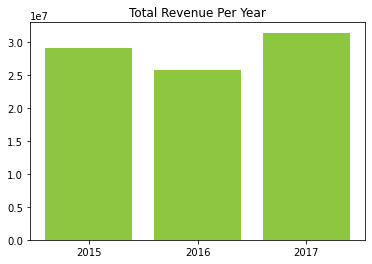

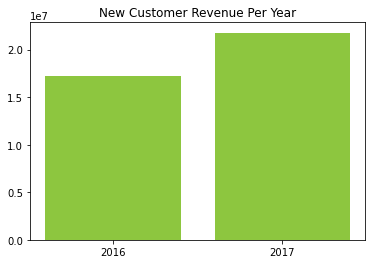

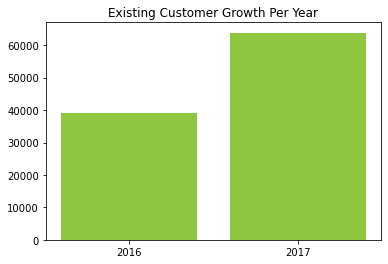

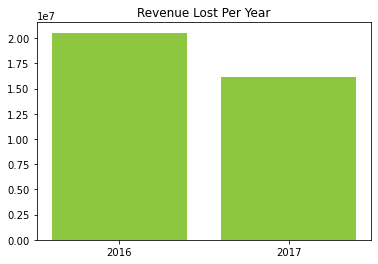

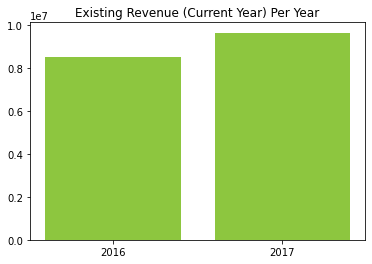

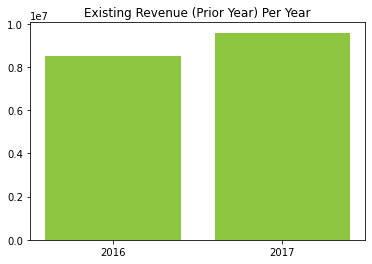

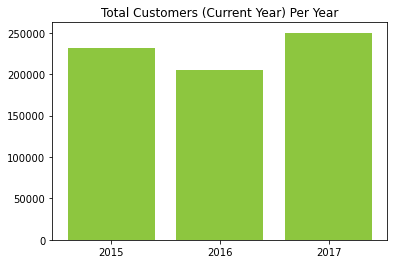

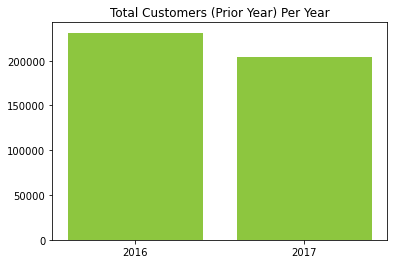

In [14]:
for col in summary_df.columns:
    if any(summary_df[col].isnull()):
        plt.figure()
        plt.bar(summary_df.index[1:], summary_df[col].iloc[1:])
        plt.title('{} Per Year'.format(col))
        plt.show()
    else:
        plt.figure()
        plt.bar(summary_df.index, summary_df[col])
        plt.title('{} Per Year'.format(col))
        plt.show()

### Other plots of interest

One thing I was curious about was whether any customers rejoined after churning, and if so is there any trend in their associated revenues?

In [15]:
churn_then_rejoined = list(custs_2015.intersection(custs_2017)-custs_2016)
print('{} customers churned in 2016 and rejoined in 2017'.format(len(churn_then_rejoined)))

0 customers churned in 2016 and rejoined in 2017


Huh! I wouldn't have expected that.

How about revenue loss as a percentage of total revenue?

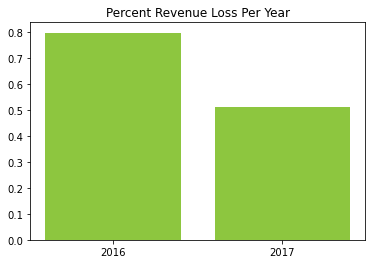

In [16]:
summary_df['Percent Revenue Loss'] = summary_df['Revenue Lost']/summary_df['Total Revenue']
col = 'Percent Revenue Loss'
plt.figure()
plt.bar(summary_df.index[1:], summary_df[col].iloc[1:])
plt.title('{} Per Year'.format(col))
plt.show()


Definitely some difference there.

I'm curious about the revenue deltas for existing customers year-to-year.

In [22]:
pd.options.mode.chained_assignment = None
# Customers that existed in 2015 and 2016
existing_customer_2015_raw = df_2015.set_index('customer_email').loc[existing_custs_2016]['net_revenue']
existing_customer_2016_1_raw = df_2016.set_index('customer_email').loc[existing_custs_2016]['net_revenue']

# Customers that existed in 2016 and 2017
existing_customer_2016_2_raw = df_2016.set_index('customer_email').loc[existing_custs_2017]['net_revenue']
existing_customer_2017_raw = df_2017.set_index('customer_email').loc[existing_custs_2017]['net_revenue']

df_2016_existing = df_2016.set_index('customer_email').loc[existing_custs_2016].copy()
df_2017_existing = df_2017.set_index('customer_email').loc[existing_custs_2017].copy()
df_2016_existing['Existing Customer Rev Delta'] = existing_customer_2016_1_raw - existing_customer_2015_raw
df_2017_existing['Existing Customer Rev Delta'] = existing_customer_2017_raw - existing_customer_2016_2_raw


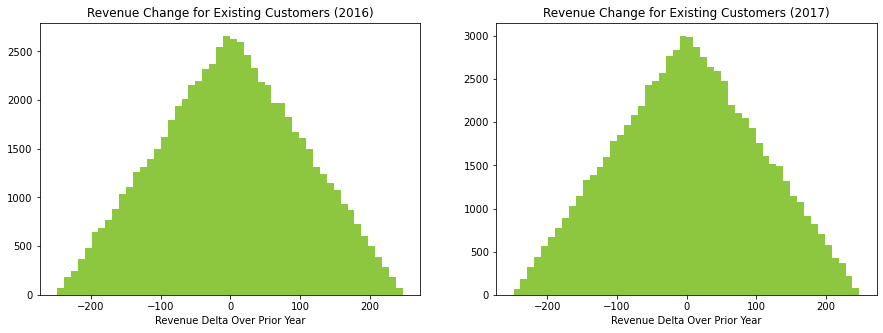

In [28]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax.hist(df_2016_existing['Existing Customer Rev Delta'], bins=50)
ax.set_title('Revenue Change for Existing Customers (2016)')
ax.set_xlabel('Revenue Delta Over Prior Year')
ax2.hist(df_2017_existing['Existing Customer Rev Delta'], bins=50)
ax2.set_title('Revenue Change for Existing Customers (2017)')
ax2.set_xlabel('Revenue Delta Over Prior Year')
plt.show()


Super symetric. Again, pretty surprising. 

How about customers that stayed between 2015 and 2016, then exited in 2017?

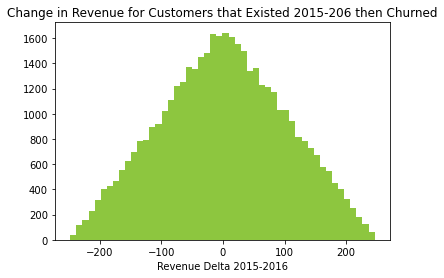

In [34]:
lost_after_staying = list(set(existing_custs_2016).intersection(lost_2016))
plt.figure()
plt.hist(df_2016_existing.loc[lost_after_staying]['Existing Customer Rev Delta'], bins=50)
plt.title('Change in Revenue for Customers that Existed 2015-206 then Churned')
plt.xlabel('Revenue Delta 2015-2016')
plt.show()

I was hoping to see some kind of trend there, perhaps if there was we could create some early intervention program for exiters.

I'm interested in who is churning. Is there some kind of trend around amount of spend vs. churn percentage in 2015 and 2016?

In [16]:
bins_rev = [0, 50, 100, 150, 200, 250]
labels_rev = ['50', '100', '150','200', '250']
df_2015 = df_2015.copy()
df_2015 = df_2015.set_index('customer_email')
df_2015['Binned_Revenue'] = pd.cut(df_2015['net_revenue'], bins=bins_rev, labels=labels_rev)
df_2015['Lost'] = 'Stayed'
df_2015['Lost'].loc[lost_2015] = 'Exited'

df_2016 = df_2016.copy()
df_2016 = df_2016.set_index('customer_email')
df_2016['Binned_Revenue'] = pd.cut(df_2016['net_revenue'], bins=bins_rev, labels=labels_rev)
df_2016['Lost'] = 'Stayed'
df_2016['Lost'].loc[lost_2016] = 'Exited'


In [17]:
lost_rev_normed_2015 = df_2015.groupby(['Binned_Revenue','Lost'])['Lost'].count()
lost_rev_normed_2015 = lost_rev_normed_2015.groupby(level=0).apply(lambda x:
                                                                     100 * x / float(x.sum()))
lost_rev_normed_2015 = lost_rev_normed_2015.unstack()

lost_rev_normed_2016 = df_2016.groupby(['Binned_Revenue','Lost'])['Lost'].count()
lost_rev_normed_2016 = lost_rev_normed_2016.groupby(level=0).apply(lambda x:
                                                                     100 * x / float(x.sum()))
lost_rev_normed_2016 = lost_rev_normed_2016.unstack()


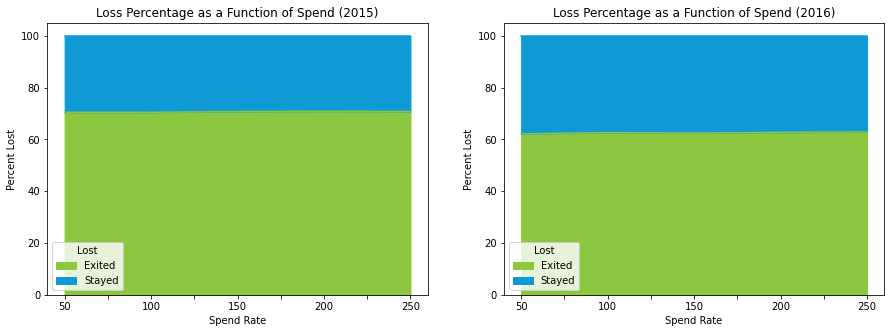

In [18]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
lost_rev_normed_2015.plot.area(ax = ax)
ax.set_title('Loss Percentage as a Function of Spend (2015)')
ax.set_xlabel('Spend Rate')
ax.set_ylabel('Percent Lost')
lost_rev_normed_2016.plot.area(ax = ax2)
ax2.set_title('Loss Percentage as a Function of Spend (2016)')
ax2.set_xlabel('Spend Rate')
ax2.set_ylabel('Percent Lost')
plt.show()


They're almost identical across spend bracket! The only difference in each year is seems to be the average overall rate. I wouldn't have expected that. 

This dataset has stumped me. 